In [351]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


In [381]:
def ExpGaussian(x,a0,a1,x0,A,sigma, mu):
    f= a0+a1*(x-x0)+A*np.exp(-0.5*((mu-x)/sigma)**2)
    return f 
def Gaussian(x, A,sigma, mu):
    g=A*np.exp(-0.5*((mu-x)/sigma)**2)
    return g
def linear(x,a0,a1,x0):
    r=a0+a1*(x-x0)
    return r

In [382]:
AAire22Na=np.loadtxt('Aire_22Na_mtime_05min.dat', unpack=True)
AArena22Na05=np.loadtxt('Arena_05cm_22Na_mtime_05min.dat',unpack=True)
AArena22Na10=np.loadtxt('Arena_10cm_22Na_mtime_05min.dat',unpack=True)
AParafina22Na8=np.loadtxt('Parafina_08cm_22Na_mtime_05min.dat',unpack=True)
AParafina22Na16=np.loadtxt('Parafina_16cm_22Na_mtime_05min.dat',unpack=True)

N=[i+1 for i in range(1024)]

In [383]:
#Energy Calibration E= a0+a1*N
def EnergyCalibration22Na(x):
    E2Na=1274.5
    A2=np.amax(AAire22Na[600:1000]) #Corresponds to E2Na=1274.5 keV
    m2=np.where(AAire22Na==A2)[0]

    E1Na=511
    A1=np.amax(AAire22Na[200:400]) #Corresponds to E1Na=511 keV
    m1=np.where(AAire22Na==A1)[0]
    E= E1Na+ ((E1Na-E2Na)/(m2-m1))*m1 + ((E2Na-E1Na)/(m2-m1))*x
    return E 

E22Na=EnergyCalibration22Na(N)

In [387]:
#1
popt, pcov = curve_fit(ExpGaussian, N[280:450], AAire22Na[280:450], p0=[700,-10,335,29300,12,350])
Ad1Aire22Na=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
E1Aire22Na=[ExpGaussian(i,popt[0],popt[1],popt[2],popt[3],popt[4], popt[5]) for i in range(len(N))]
R1Aire22Na=[linear(i, popt[0], popt[1], popt[2]) for i in range(len(N))]
print(popt)

[ -8.21639773e+04  -3.93809034e+00   2.14331854e+04   2.90180211e+04
   1.04491069e+01   3.35293594e+02]


In [393]:
#2
popt, pcov = curve_fit(ExpGaussian, N[750:900], AAire22Na[750:900], p0=[900,-20,815,3600,15,815])
Ad2Aire22Na=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
E2Aire22Na=[ExpGaussian(i,popt[0],popt[1],popt[2],popt[3],popt[4], popt[5]) for i in range(len(N))]
R2Aire22Na=[linear(i, popt[0], popt[1], popt[2]) for i in range(len(N))]


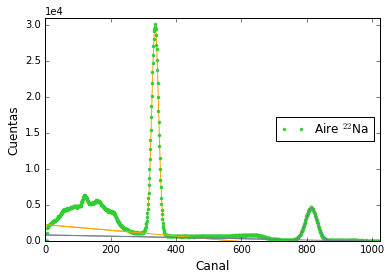

In [402]:
plt.show()
plt.ylim(0, 31000)
plt.xlim(0,1024)
#plt.xlim(200,500)
#plt.xlim(700,900)
plt.legend(loc=5)
plt.xlabel('Canal')
plt.ylabel('Cuentas')
#plt.plot(N, Ad1Aire22Na, '--')
plt.plot(N,E1Aire22Na, color='orange')
#plt.plot(N, Ad2Aire22Na, '.',color='black')
plt.plot(N,AAire22Na, '.',label='Aire ${}^{22}$Na', color='limegreen')
plt.plot(N,R1Aire22Na,color='orange')
plt.plot(N,R2Aire22Na, color='slategrey')
plt.plot(N,E2Aire22Na, color='slategrey')
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0) )
plt.legend(loc=5)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Cuentas', fontsize=12)
plt.savefig('Aire22Na.jpg')


(0, 2950)

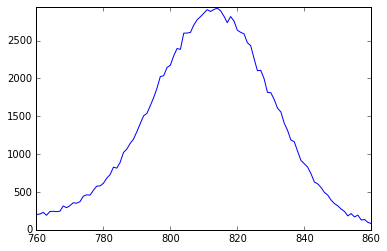

In [390]:
plt.plot(N, AArena22Na05, label='Arena ${}^{22}$Na, $d=0.5$ cm' )
#plt.xlim(300,360)
plt.xlim(760,860)
plt.ylim(0,2950)

In [359]:
#1, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[300:400], AArena22Na05[300:400], p0=[1500,-100,335,14500,12,335])
Ad1Arena22Na05=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[  1.03715454e+04  -2.25700431e+01  -5.30457170e+01   1.38350916e+04
   1.02446449e+01   3.34805510e+02]


In [360]:
#2, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[700:900],  AArena22Na05[700:900], p0=[250,-1,815,2700,18,815])
Ad2Arena22Na05=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[  5.94914089e+02  -1.04197550e+00   3.33255458e+02   2.79160818e+03
   1.74352650e+01   8.12796690e+02]


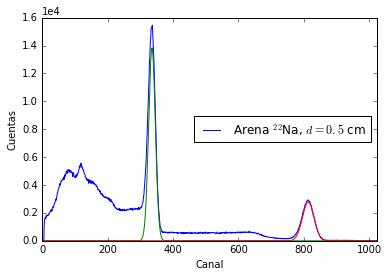

In [361]:
plt.plot(N, AArena22Na05, label='Arena ${}^{22}$Na, $d=0.5$ cm' )
plt.plot(N, Ad1Arena22Na05)
plt.plot(N, Ad2Arena22Na05)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0) )
plt.legend(loc=5)
plt.xlim(0,1024)
plt.xlabel('Canal')
plt.ylabel('Cuentas')

(0, 9700)

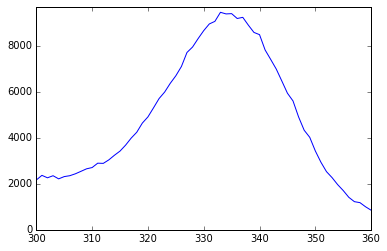

In [362]:
plt.plot(N, AArena22Na10, label='Arena ${}^{22}$Na, $d=0.5$ cm' )
plt.xlim(300,360)
#plt.xlim(760,860)
plt.ylim(0,9700)


In [363]:
#2, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[700:900],  AArena22Na10[700:900], p0=[250,-1,815,2100,18,815])
Ad2Arena22Na10=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[ -1.18964741e+03  -1.07119660e+00   2.00831918e+03   1.93715369e+03
   1.73574795e+01   8.12263395e+02]


In [364]:
#1, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[300:400], AArena22Na10[300:400], p0=[1500,-100,335,8200,12,335])
Ad1Arena22Na10=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[ 10021.82196208    -21.59436604    -59.18855726   7899.59024995
     10.10445814    334.24175297]


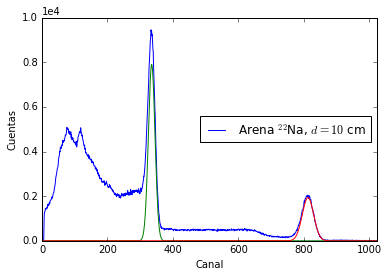

In [365]:
plt.plot(N, AArena22Na10, label='Arena ${}^{22}$Na, $d=10$ cm' )
plt.plot(N, Ad1Arena22Na10)
plt.plot(N, Ad2Arena22Na10)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0) )
plt.legend(loc=5)
plt.xlim(0,1024)
plt.xlabel('Canal')
plt.ylabel('Cuentas')

(300, 360)

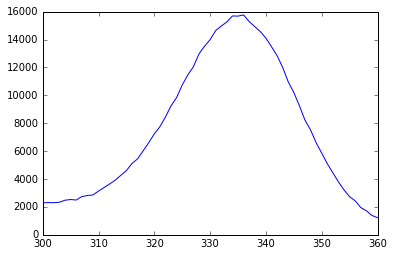

In [366]:
plt.plot(N,AParafina22Na8, label='Parafina ${}^{22}$Na')
plt.xlim(300,360)
#plt.xlim(760,860)
#plt.ylim(0,3000)


In [367]:
#1, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[300:400], AParafina22Na8[300:400], p0=[2000,-100,335,14000,12,335])
Ad1Parafina22Na8=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[ -9.49673166e+03  -2.17514726e+01   8.44806263e+02   1.40877620e+04
   1.02830897e+01   3.34718984e+02]


In [368]:
#2, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[700:900],  AParafina22Na8[700:900], p0=[200,-1,815,2800,18,815])
Ad2Parafina22Na8=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[ -3.93610589e+03  -1.05194445e+00   4.64491685e+03   2.81217612e+03
   1.74486041e+01   8.12747418e+02]


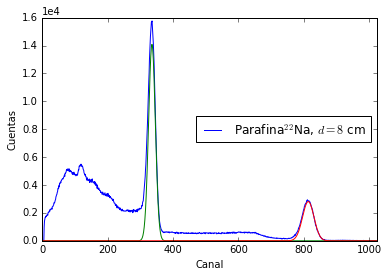

In [369]:
plt.plot(N, AParafina22Na8, label='Parafina${}^{22}$Na, $d=8$ cm' )
plt.plot(N, Ad1Parafina22Na8)
plt.plot(N, Ad2Parafina22Na8)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0) )
plt.legend(loc=5)
plt.xlim(0,1024)
plt.xlabel('Canal')
plt.ylabel('Cuentas')

(0, 1900)

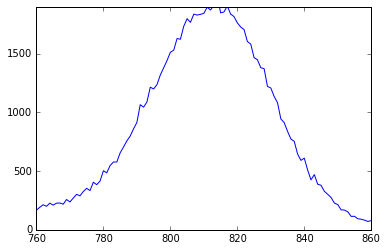

In [370]:
plt.plot(N,AParafina22Na16, label='Parafina ${}^{22}$Na')
#plt.xlim(300,360)
plt.xlim(760,860)
plt.ylim(0,1900)

In [371]:
#1, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[300:400], AParafina22Na16[300:400], p0=[1500,-100,335,7200,12,335])
Ad1Parafina22Na16=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[-4394.46728575   -20.55289923   618.14970939  7205.06858918    10.1502573
   334.24634906]


In [372]:
#2, p0=[a0,a1,x0,A,sigma, mu]
popt, pcov = curve_fit(ExpGaussian, N[700:900],  AParafina22Na16[700:900], p0=[200,-1,815,1700,18,815])
Ad2Parafina22Na16=[Gaussian(i, popt[3], popt[4], popt[5]) for i in range(len(N))]
print(popt)

[  2.72650844e+04  -1.08302738e+00  -2.42784731e+04   1.82306957e+03
   1.74797133e+01   8.12443633e+02]


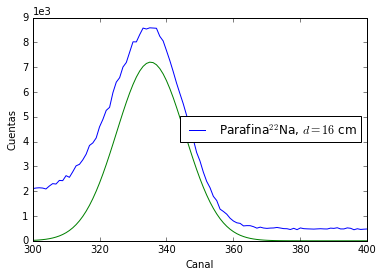

In [373]:
plt.plot(N, AParafina22Na16, label='Parafina${}^{22}$Na, $d=16$ cm' )
plt.plot(N, Ad1Parafina22Na16)
plt.plot(N, Ad2Parafina22Na16)
plt.ticklabel_format(style='sci', axis='y',scilimits=(0,0) )
plt.legend(loc=5)
plt.xlim(300,400)
plt.xlabel('Canal')
plt.ylabel('Cuentas')